# Définition et premier exemple

**Définition:**

**Une fonction est dite récursive si elle s'appelle elle même.**

**Exemple:**

Les deux fonctions suivantes calculent la puissance $n$-ieme de $x$ en utilisant uniquement l'opération multiplication.

La première fonction utilise un algorithme "habituel" avec une méthode itérative basée sur une boucle for.

In [1]:
def puissance_iterative(x,n) :
    resultat = 1
    for i in range(n):
        resultat = x*resultat
    return resultat

On peut alors tester cette fonction en calculant $2^8$

In [2]:
test_iteratif = puissance_iterative(2,8)
print(test_iteratif)

256


La deuxième fonction utilise un algorithme récursif qui s'appelle lui même.

In [3]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

In [4]:
test_recursif = puissance_recursive(2,8)
print(test_recursif)

256


Les deux fonctions donnent le même résultat mais fonctionne différement.

**Méthode itérative:**

La fonction itérative réalise une boucle en calculant dans l'ordre :

- 1 
- puis $1 \times 2 = 2$
- puis $2 \times 2=4$
- puis $4 \times 2 = 8$
- puis ...

Elle stocke la valeur du résultat dans un nombre à chaque tour de boucle, et retourne en fin de boucle le résultat final.

**Méthode récursive:**

La fonction récursive appelle les calculs dans l'ordre inverse :

- si je connais le résultat de $2^7$ alors je dois calculer $2 \times 2^7 = 2^8$
- si je connais le résultat de $2^6$ alors je dois calculer $2 \times 2^6 = 2^7$
- si je connais le résultat de $2^5$ alors je dois calculer $2 \times 2^5 = 2^6$
- si ...
- si je connais le résultat de $2^0$ alors je dois calculer $2 \times 2^0 = 2^1$
- je connais le résultat de $2^0$ c'est $1$
- donc je peux calculer $2^1 = 2 \times 2^0 = 2 \times 1 = 2$
- donc je peux calculer $2^2 = 2 \times 2^1 = 2 \times 2 = 4$
- donc ...
- donc je peux calculer $2^8 = 2 \times 128 = 256$

# Pile d'appel, critère d'arrêt et terminaison

On reconnait une structure de pile dans l'appel récursif d'une fonction :

- la pile d'appel est vide
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,7)"
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,6)"
- j'empile : "je dois calculer 2 $\times$ puissance_recursive(2,5)"
- j'empile : ...
- je connais puissance_recursive(2,0) = 1
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,0)" et je calcule : puissance_recursive(2,1) = 2 $\times$ 1 = 2
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,1)" et je calcule : puissance_recursive(2,1) = 2 $\times$ 1 = 2
- je dépile : ...
- je dépile l'appel suivant "je dois calculer 2 $\times$ puissance_recursive(2,7)" et je calcule : puissance_recursive(2,8) = 2 $\times$ 128 = 256
- la pile d'appel est vide, j'ai finit le résultat est 256.

Le critère qui nous informe quand on doit arrêter d'empiler de nouveaux appels et passer à dépiler c'est lorsque l'on rencontre ce que l'on appelle **le cas d'arrêt**, ici $2^0$, dont on connait la valeur à retourner, ici 1. Lors de l'écriture d'une fonction récursive il faut bien s'assurer que les appels successifs rencontrent le cas d'arrêt, ici l'exposant $k$ de $2^k$ diminue de 1 à chaque appel, pour assurer **la terminaison du programme**.

Par exemple la fonction puissance_recursive($x$,$n$) écrite plus haut ne se termine jamais pour des valeurs de $n$ non entière ou négative, on dit que la terminaison du programme n'est pas assuré pour ces valeurs.

# Exercice d'application :

Ecrire deux fonctions prenant en argument un entier positif $n$, qui retournent factorielle n ,$n!$. Une fonction utilisera une méthode itérative et l'autre une méthode récursive. Tester vos deux fonctions.

# Récursivité et récurrence

On remarque qu'une fonction récursive est liée à la notion de suite définie par récurrence.

Une suite définie par récurrence est une suite définie par son ou ses premiers termes et par une relation de récurrence, qui définie chaque terme à partir du ou des précédents.

Par exemple la suite $(u_n)$ telle que :

$u_0 = 2$

et

$u_n = \dfrac{1}{2}\left(u_{n-1}+\dfrac{3}{u_{n-1}}\right)$

est définie par récurrence.

Le premier terme correspond au cas d'arrêt, si n = 0 alors la valeur de $u_n$ est connue, c'est $u_0 = 2$.

La relation de récurrence, correspond à l'appel de la fonction par elle même, $u_n$ est exprimée en fonction de $u_{n-1}$.

Enfin à chaque relation de récurrence l'indice de la suite diminue de 1, on atteint donc bien le cas d'arrêt qui est $u_0 = 2$ après $n$ appel de la relation de récurrence, la terminaison du programme est assurée.

**Exercice:**

Ecrire une fonction récursive qui prend en argument un indice $n$ et retourne le terme de la série $u_n$. Testez votre fonction pour les premières valeurs de la suite et remarquez qu'elle converge rapidement vers $\sqrt{3}$.

# Exercice: 

On définit la fonction suivante qui repère dans le plan complexe les affixes des quatres sommets d'un carré.

In [5]:
def carre(a, b):
    return [a, b, b - 1j * (a - b), a + 1j * (b - a), a]

On peut alors tracer un carré avec la librairie matplotlib en reliant les quatres coins du carré.

In [6]:
import matplotlib.pyplot as plt
L = carre(1, 1 + 1j)
plt.axis('equal')
for a in L:
    plt.plot([a.real for a in L], [a.imag for a in L], 'b', lw=2)
plt.show()

<Figure size 640x480 with 1 Axes>

Écrire une fonction récursive qui permet d’obtenir la figure suivante

À partir d’un segment $[a, b]$ où a et b sont complexes, on trace le segment $[a,\dfrac{1}{4}(3a + b)]$ puis on recommence avec a $\leftarrow$  a et b $\leftarrow a + \dfrac{1}{2}(b - a)e^i$ ; a $\leftarrow$  a et b $\leftarrow a+ \dfrac{1}{2}(b - a)e^{ -i}$ et enfin a $\leftarrow \dfrac{1}{4}(3a+b)$ et b  $\leftarrow$  b.

Tracer la figure en partant de a = 0 et b = 2.

# Rappels sur la complexité temporelle

L'exécution d'un programme nécessite d'utiliser plus ou moins les capacités de votre ordinateur. Ceci ce quantifie avec deux facteurs principaux: le temps de calcul et la mémoire occupé lors de l'exécution. Pour être plus performant un programme doit demander le moins de ressource possible à l'ordinateur et donc avoir un temps de calcul court et une petite mémoire occupée.

Pour quantifier les besoins nécessaire à l'éxécution d'un programme, on utilise la complexité. On parle de complexité temporelle lorsqu'il s'agit du temps de réponse, et de complexité spatiale pour l'espace mémoire. Ce paragraphe traitera de la complexité temporelle.

Le temps exact en seconde que prend un programme à effectuer un programme dépend de nombreux facteurs techniques propores à chaque machine. On peut estimer l'influence de l'algorithme sur le temps en considérant que chaque opération élémentaire ( addition, multiplication, comparaison, ... ) représente une unité de coût sans préciser le temps en seconde pour chaque unité de coût. La complexité temporelle est le nombre total d'unité de coût pour l'exécution de cet algorithme.

Enfin on étudie l'évolution de cette complexité en fonction de la taille des données à étudier. En effet l'algorithme ne fera pas le même nombre d'opération selon le problème à traiter par exemple le nombre d'élément d'une liste à trier ou la valeur du nombre à calculer. Lorsqu'on étudie la complexité on étudie donc un équivalent de l'unité de coût en fonction de la taille des données.

Si C(n) est la complexité pour des données de taille n, alors on peut avoir comme résultat :
- $C(n) = O(\log(n))$, complexité logarithmique
- $C(n) = O(n)$, complexité linéaire
- $C(n) = O(n\log(n))$, complexité quasi-linéaire
- $C(n) = O(n^2)$, complexité quadratique
- $C(n) = O(n^k)$, complexité polynomiale
- $C(n) = O(\exp(n))$, complexité exponentielle

Reprenons le programme itératif calculant la puissance $n$-ième d'un nombre $x$

In [7]:
def puissance_iterative(x,n) :
    resultat = 1
    for i in range(n):
        resultat = x*resultat
    return resultat

Et calculons sa complexité en fonction de la puissance $n$

Ce programme commence par affecter 1 à résultat donc on compte 1 unité de coût
Ce programme fait une boucle $n$ fois donc on va multiplier par n le coût suivant:
    dans la boucle le programme effectue une multiplication donc 1 unité de coût
    
La complexité du programme est donc $C(n) = 1 + n\times 1 = O(n)$ c'est une complexité linéaire selon la puissance calculée.

On peut vérifier ce résultat à l'aide du programme ci-dessous qui mesure 1000 fois le temps d'exécution de la fonction puissance_iterative pour les puissance de 2 entre 0 et 99.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


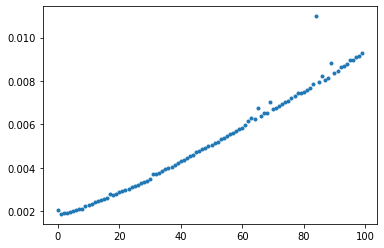

In [8]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_iterative(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

# La complexité temporelle dans le cas d'un programme récursif

Avec un programme itératif nous avons pu estimer la complexité du programme à l'aide d'une expression explicite $C(n)$ est directement une fonction de $n$. En effet l'écriture d'un programme itératif explicite directement toutes les opérations effectuées.

Ce n'est pas le cas pour un programme récursif où par définition le programme s'appelle lui même. A la lecture du code du programme on est seuleument capable d'exprimer la complexité pour une taille $n$ en fonction de la complexité pour une taille inférieure.

Reprenons par exemple le programme récursif calculant aussi la puissance $n$-ième d'un nombre x.

In [9]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

Exprimons sa complexité en lisant la structure du programme.

Si n = 0, alors on affecte 1 au résultat donc $C(0) = 1$

Si n > 0, alors on éffectue toute les opérations pour calculer puissance_recursive(x,n-1) soit $C(n-1)$ et on ajoute une opération en multipliant par x le résultat.
On en déduit $C(n) = C(n-1)+1$

On obtient donc une relation de récurrence qui définit la complexité :

$C(n) = C(n-1)+1$ et $C(0) = 1$

Il s'agit d'une suite arithmétique que l'on peut résoudre avec $C(n) = n+1 = O(n)$
On en déduit donc une complexité linéaire aussi.

Et on peut vérifier ce résultat de la même façon que pour le programme itératif avec le programme suivant.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


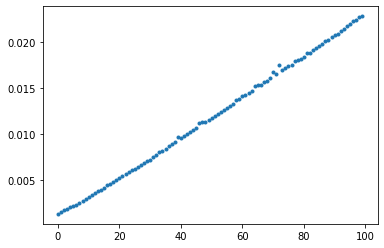

In [10]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_recursive(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

Pour les deux programmes ci-dessus on obtient dans les deux cas une complexité linéaire, on dit que les deux programmes ont une complexité équivalente. Lorsque l'on veut améliorer un programme on utilise un programme ayant le même but avec une complexité inférieure. Prenons l'exemple de la fonction puissance_rapide(x, n) ci-dessous.

Dans le programme ci-dessous x//y renvoi le quotient de la division euclidienne de n par 2, et x%y renvoi le reste de la division euclidienne de x par 2.

In [11]:
def puissance_rapide(x, n):
    if n == 0:
        return 1
    else:
        r = puissance_rapide(x, n // 2)
        if n % 2 == 0:
            return r * r
        else:
            return x * r * r

Evaluons sa complexité en lisant le programme :

si n=0, alors on affecte 1 au résultat donc $C(0) = 1$

si n>0, alors on effectue le nombre d'opération pour calculer puissance_rapide(x, n/2) puis on effectue une multiplication, donc $C(n) = C(n/2) + 1$

On a donc pour $C(n)$ la relation de récurrence $C(n) = C(n/2) + 1$ et $C(0) = 1$. Pour évaluer $C(n)$ on peut effectuer le changement de variable $n=2^k$ donc $C(2^k) = C(2^(k-1)) + 1$ et $C(2^0) = C(0)+1 = 2$. Il s'agit donc d'une suite arithmétique avec $k$ d'où $C(2^k) = k+2$ or $2^k = n$ d'où $k = \log_2(n)$ et $C(n) = \log_2(n)+2$.

Il s'agit donc d'une complexité logarithmique et donc d'un programme plus performant que les précédents pour calculer la puissance n-ième de x. Dans certains cas un fonction récursive permet de diminuer la complexité temporelle de l'algorithme.
Vérifions ce résultat à nouveau.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


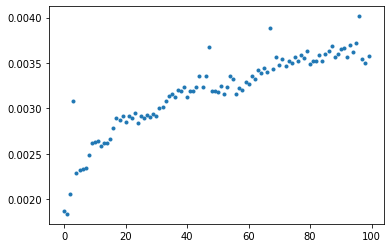

In [12]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_rapide(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

On remarque que la complexité est sub-linéaire, pour s'assurer qu'il s'agit bien d'une complexité logarithmique traçons plutôt le temps d'éxecution en fonction de $\log(n)$ avec :

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


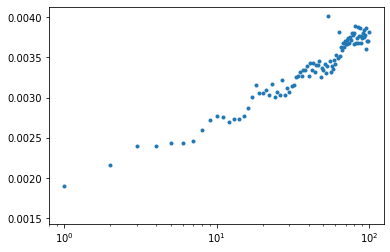

In [13]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_rapide(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
        
plt.semilogx(resultat,'.')
plt.show()

## Exercice

En reprenant les programmes ci-dessous évaluer leur complexité temporelle et vérifier votre résultat.

### le calcul de factorielle itératif

In [14]:
def factorielle_classique(n):
    resultat = 1
    for i in range(n):
        resultat = (i+1)*resultat
    return resultat

### le calcul de factorielle récursif

In [15]:
def factorielle_recursive(n):
    if n==1:
        return 1
    else :
        resultat = n*factorielle_recursive(n-1)
        return resultat

Que pouvez-vous conclure sur l'intérêt d'utiliser une fonction récursive par rapport à une fonction itérative pour évaluer la fonction factorielle ?

### la suite définie par récurrence

In [16]:
def u(n):
    if n == 0:
        return 2.
    else:
        return 0.5 * (u(n-1) + 3. / u(n-1))

si on compare au même programme mais écrit légèrement différement suivant

In [17]:
def u(n):
    if n == 0:
        return 2.
    else:
        intermediaire = u(n-1)
        return 0.5 * (intermediaire + 3. / intermediaire)

On en déduit que la récursivité permet d'écrire naturellement les relations de récurrence, mais qu'il faut faire attention à la complexité.

## Exercice

Soit l une liste triée par ordre croissant et x un élément à chercher dans cette liste.

Ecrire un programme récursif qui prend en argument la liste triée l et l'élément à rechercher x et qui renvoie True si x est dans l, et False si x n'est pas dans l. On utilisera une méthode de recherche par dichotomie.

Puis évaluer et vérifier sa complexité.

## Exercice

On considère la suite de Fibonacci définie par :

$F_0 = 0$

$F_1 = 1$

$F_n = F_{n-1}+F_{n-2}$

Écrire une fonction récursive basée sur ces relations qui prend n en argument et renvoie $F_n$.

Quelle est sa complexité ?

Accélérer le calcul de $F_n$ en écrivant plutôt une fonction récursive auxiliaire qui prend en arguments $F_{n−1}$,
$F_n$ et $k > 0$ et renvoie $F_{n+k}$ (on pourra poser $F_{-1} = 1$).

Quelle est la nouvelle complexité ?

# Complexité spatiale

La complexité spatiale est analogue à la complexité temporelle, sauf qu'on évalue l'espace mémoire nécessaire à l'exécution de la fonction en fonction de la taille des données.

Prenons l'exemple de la fonction itérative de calcul de la puissance n-ième de x

In [18]:
def puissance_iterative(x,n) :
    resultat = 1
    for i in range(n):
        resultat = x*resultat
    return resultat

Ce programme exécute une boucle de 0 à n-1 et affecte la nouvelle valeur de resultat. L'espace mémoire utilisé est juste 1 nombre stocké dans la variable resultat. On obtient donc une complexité spatiale C(n) = O(1), elle est indépendante de $n$. 

Prenons maintenant l'exemple de la fonction récursive

In [19]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

Cette fois-ci un appel de la fonction puissance_recursive consiste à stocker une valeur de résultat. Pour un appel de la fonction, on a donc une complexité spatiale de O(1). Mais n appels récursifs sont stockés dans la pile d'appels lors de l'exécution de la fonction, en effet puissance(x,n) demande d'appeler puissance(x,n-1) puis puissance(x,n-2) puis ... jusqu'au critère d'arrêt puissance(x,0). Donc la complexité spatiale totale est de $C(n) = n\times O(1) = O(n)$, elle est linéaire.

Enfin pour la fonction récursive accélérée

In [20]:
def puissance_rapide(x, n):
    if n == 0:
        return 1
    else:
        r = puissance_rapide(x, n // 2)
        if n % 2 == 0:
            return r * r
        else:
            return x * r * r

Encore une fois on stocke un nombre r pour un appel donc la complexité d'un appel est $O(1)$. Pour calculer le nombre d'appels on introduit k tel que $n = 2^k$ et on fait réalise les appels suivant puissance_rapide(x, $n = 2^k$ ), puis puissance_rapide(x, $n/2 = 2^{k-1}$ ),  puis puissance_rapide(x, $n/4 = 2^{k-2}$ ), ... Donc on effectue $k = log_2(n)$ appels. La complexité spatiale de la fonction est donc $C(n) = log_2(n)\times O(1) = O(\ln n )$, elle est logarithmique.

### exercice:

Calculer la complexité spatiale du programme récursif suivant:

In [21]:
def u(n):
    if n == 0:
        return 2.
    else:
        return 0.5 * (u(n-1) + 3. / u(n-1))

### exercice

Soit l une liste triée par ordre croissant et x un élément à chercher dans cette liste.

Reprendre le programme récursif qui prend en argument la liste triée l et l'élément à rechercher x et qui renvoie True si x est dans l, et False si x n'est pas dans l. On utilisera une méthode de recherche par dichotomie.

Puis calculer sa complexité spatiale.

# Comparaison entre itératif et récursif

À travers les différents exemples rencontrés, on remarque que les programmes récursifs présentent l'avantage d'avoir une écriture plus concise que les programmes itératifs, car on n'a pas besoin d'utiliser de boucle.

On remarque également que dans un contexte où une relation de récurrence existe pour résoudre le problème, le programme récursif est plus simple à écrire que le programme itératif.

Par exemple écrire un programme itératif qui calcule les termes de la suite $(u_n)$ telle que :

$u_0 = 2$

et

$u_n = \dfrac{1}{2}\left(u_{n-1}+\dfrac{3}{u_{n-1}}\right)$

est plus compliqué que d'utiliser un programme récursif.

Mais lors de l'écriture d'un programme récursif, il faut faire attention à la complexité.

La complexité temporelle du programme si on ne fait pas attention peut être élevée, par exemple elle peut être exponentielle selon l'écriture du programme qui calcule la suite $(u_n)$. Certains cas particulier comme puissance_rapide où on divise la taille de l'argument en 2 à chaque appel peuvent présenter une complexité récursive inférieure à l'itérative correspondante.

La complexité spatiale est minimale pour un programme itératif, un programme récursif utilisera toujours plus d'espace mémoire que le programme itératif correspondant.

# Terminaison

Lors de l'écriture d'un programme récursif, il faut faire attention à ce que le programme s'arrête un jour.

Prenons l'exemple de calcul de puissance :



In [22]:
def puissance_rapide(x, n):
    if n == 0:
        return 1
    else:
        r = puissance_rapide(x, n // 2)
        if n % 2 == 0:
            return r * r
        else:
            return x * r * r

Identifiez la touche qui vous permet d'interrompre l'exécution de votre programme manuellement et testez ce programme pour des puissances non entières ou des puissances négatives.

Que ce passe-t-il, et pourquoi ?

Il faut s'assurer lors de l'écriture d'un programme récursif qu'il possède un cas d'arrêt et que ce cas d'arrêt est atteint.

De manière plus formelle, la terminaison est assurée lorsque l'on peut identifier dans le programme un entier positif qui décroît à chaque appel récursif et qui prend une valeur définissant un cas d'arrêt.

# Récursivité terminale

Il s'agit d'un type de programme récursif particulier qui ont pour objectif d'être plus rapide lors de l'exécution de la pile d'appels récursifs.

Les programmes récursifs écrits utilisent en général l'appel récursif dans une opération ou comme argument d'une fonction. Par exemple dans le programme suivant l'appel récursif intervient dans une multiplication

In [23]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

Une version récursive terminale de ce programme ne fait pas intervenir l'appel récursif dans aucune opération ni comme argument de fonction, ce qui donnerait :

In [24]:
def puissance_recursive(x,n) :
    def puissance_recursive_terminale(x,k,intermediaire) :
        if k == 0 :
            return intermediaire
        else :
            return puissance_recursive_terminale(x,k-1,intermediaire*x)
    return puissance_recursive_terminale(x,n,1)

On remarque dans ce programme que puissance_recursive_terminale n'est appelé que dans les return. Les valeurs renvoyées par l'appel récursif ne sont pas utilisées dans des opérations ou en argument d'autre fonction.

L'opération de récurrence est cette fois-ci effectuée en argument de la fonction récursive et non l'inverse.

Si on détaille l'ordre des appels récursifs de la version terminale on a :

- puissance_récursive appelle puissance_recursive_terminale(x,n,1) donc demande : "combien vaut $x^n \times 1$ ?"

- puissance_recursive_terminale(x,n,1) ne répond pas mais appelle puissance_recursive_terminale(x,n-1,1*x), donc demande : "combien vaut $x^{n-1} \times (1\times x)$ ?"

- puissance_recursive_terminale(x,n-1,x) ne répond pas mais appelle puissance_recursive_terminale(x,n-2,x*x), donc demande : "combien vaut $x^{n-2} \times (x\times x)$ ?"

- puissance_recursive_terminale(x,n-2,$x^2$) ne répond pas mais appelle puissance_recursive_terminale(x,n-3,$x^2$*x), donc demande : "combien vaut $x^{n-3} \times (x^2\times x)$ ?"

- etc

- jusqu'à - puissance_recursive_terminale(x,n-(n-1),$x^{n-1}$) ne répond pas, mais appelle puissance_recursive_terminale(x,0,$x^{n-1}$*x), donc demande : "combien vaut $x^{0} \times (x^{n-1}\times x)$ ?"

- qui répond directement la valeur de $x^n$ sans avoir à dépiler la pile d'appels, car la variable intermédiare contient déjà le résultat voulu. 

### exercice:

- Ecrire un programme itératif qui prend en entrée une fonction $f$, un entier $n$ et un élément $x$ et qui calcule $f^n(x) = f o f o f o ... o f(x) = f(f(f( ... f(x)... )))$ soit la composé n-ième de f évaluée en x.

- Ecrire une version récursive de ce programme.

- Ecrire une version récursive terminale de ce programme.